In [ ]:
system("gdown --id 1i-ibYdkXihEVv1rBHyD90PnieL8Sq6S3")



# **PCA en R** (versión 26 de enero)






In [ ]:
d1<-read.table("deport.dat")

# **Parte 1: entender mejor los datos (y transformarlos si es necesario)**

In [ ]:
dim(d1)

[1] 55  9

In [ ]:
head(d1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,10.39,20.81,46.84,1.81,3.70,14.04,29.36,137.72,argentin
2,10.31,20.06,44.84,1.74,3.57,13.28,27.66,128.30,australi
3,10.44,20.81,46.82,1.79,3.60,13.26,27.72,135.90,austria
4,10.34,20.68,45.04,1.73,3.60,13.22,27.45,129.95,belgium
5,10.28,20.58,45.91,1.80,3.75,14.68,30.55,146.62,bermuda
6,10.22,20.43,45.21,1.73,3.66,13.62,28.62,133.13,brazil


In [ ]:
d<-d1[,-9]
rownames(d)<-d1[,9]
head(d)

,V1,V2,V3,V4,V5,V6,V7,V8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
argentin,10.39,20.81,46.84,1.81,3.70,14.04,29.36,137.72
australi,10.31,20.06,44.84,1.74,3.57,13.28,27.66,128.30
austria,10.44,20.81,46.82,1.79,3.60,13.26,27.72,135.90
belgium,10.34,20.68,45.04,1.73,3.60,13.22,27.45,129.95
bermuda,10.28,20.58,45.91,1.80,3.75,14.68,30.55,146.62
brazil,10.22,20.43,45.21,1.73,3.66,13.62,28.62,133.13


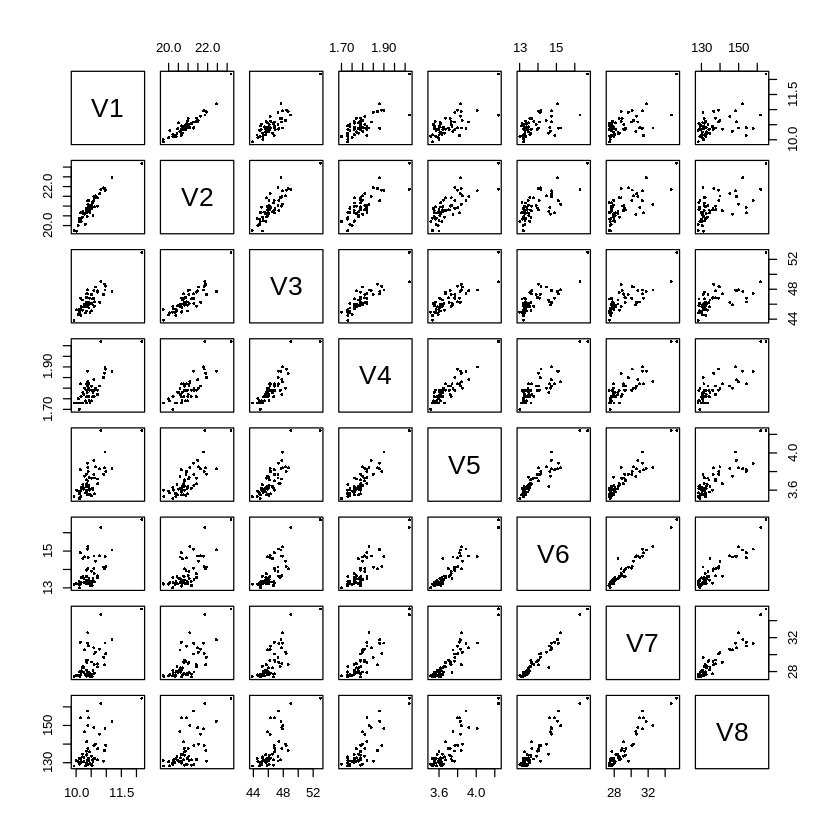

In [ ]:
pairs(d,cex=0.5,pch=16)

In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’




Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



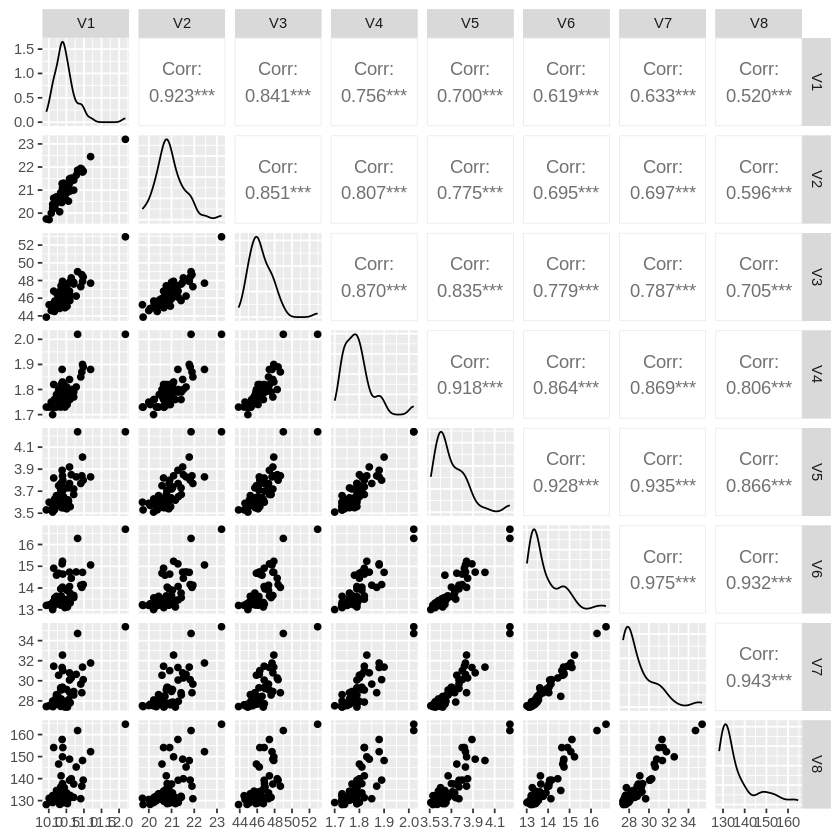

In [ ]:
library(GGally)
ggpairs(d,diag=list(continuous="densityDiag"))

In [ ]:
summary(d)

       V1              V2              V3              V4       
 Min.   : 9.93   Min.   :19.72   Min.   :43.86   Min.   :1.700  
 1st Qu.:10.27   1st Qu.:20.59   1st Qu.:45.56   1st Qu.:1.755  
 Median :10.41   Median :20.81   Median :46.10   Median :1.790  
 Mean   :10.47   Mean   :20.94   Mean   :46.44   Mean   :1.793  
 3rd Qu.:10.59   3rd Qu.:21.29   3rd Qu.:47.30   3rd Qu.:1.815  
 Max.   :12.18   Max.   :23.20   Max.   :52.94   Max.   :2.020  
       V5              V6              V7              V8       
 Min.   :3.510   Min.   :13.01   Min.   :27.38   Min.   :128.2  
 1st Qu.:3.600   1st Qu.:13.28   1st Qu.:27.70   1st Qu.:130.7  
 Median :3.640   Median :13.50   Median :28.19   Median :132.3  
 Mean   :3.698   Mean   :13.85   Mean   :28.99   Mean   :136.6  
 3rd Qu.:3.770   3rd Qu.:14.14   3rd Qu.:29.87   3rd Qu.:139.3  
 Max.   :4.240   Max.   :16.70   Max.   :35.38   Max.   :164.7  

Uno de los muchos alternativos para resumir datos numéricamente:

In [ ]:
install.packages("Hmisc");library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




In [ ]:
describe(d)

d 

 8  Variables      55  Observations
--------------------------------------------------------------------------------
V1 
       n  missing distinct     Info     Mean  pMedian      Gmd      .05 
      55        0       42    0.999    10.47    10.43   0.3473    10.10 
     .10      .25      .50      .75      .90      .95 
   10.13    10.27    10.41    10.59    10.87    10.97 

lowest : 9.93  10.01 10.07 10.11 10.12, highest: 10.94 10.96 10.98 11.19 12.18
--------------------------------------------------------------------------------
V2 
       n  missing distinct     Info     Mean  pMedian      Gmd      .05 
      55        0       51        1    20.94    20.89   0.7032    20.04 
     .10      .25      .50      .75      .90      .95 
   20.23    20.59    20.81    21.29    21.80    21.91 

lowest : 19.72 19.75 20    20.06 20.21, highest: 21.86 21.9  21.94 22.45 23.2 
--------------------------------------------------------------------------------
V3 
       n  missing distinct     In

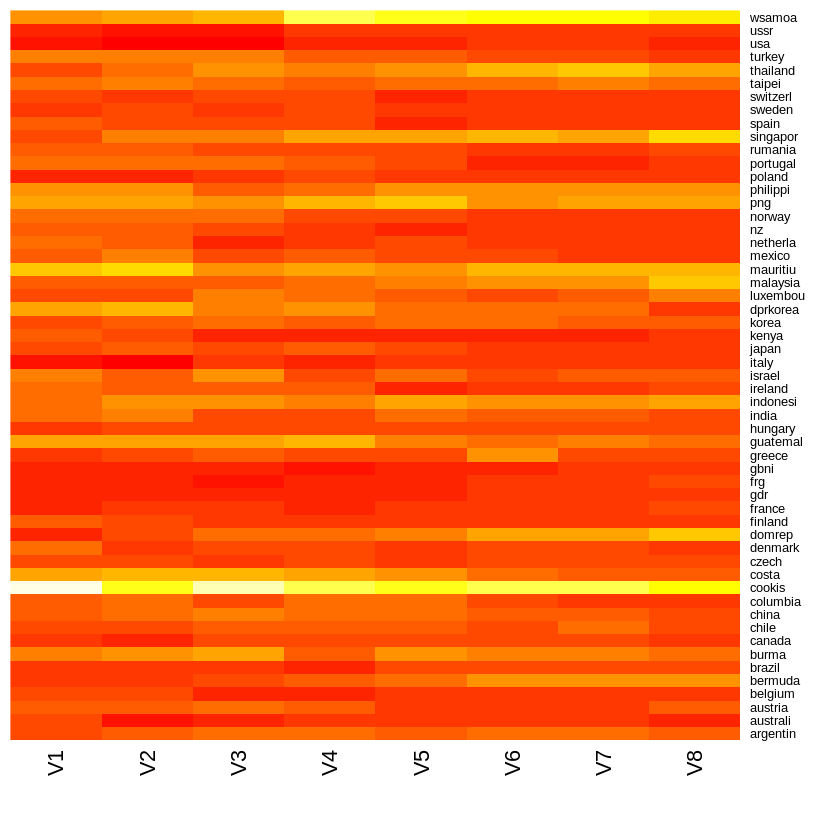

In [ ]:
heatmap(as.matrix(d),col = heat.colors(20),scale="column",Colv = NA, Rowv = NA) #https://www.datanovia.com/en/blog/top-r-color-palettes-to-know-for-great-data-visualization/

# **¿Qué observamos?**

In [ ]:
rownames(d)[d[,2]>23]

[1] "cookis"

In [ ]:
colores=rep("blue",dim(d)[1])
colores

[1] "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue"
[11] "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue"
[21] "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue"
[31] "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue"
[41] "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue"
[51] "blue" "blue" "blue" "blue" "blue"

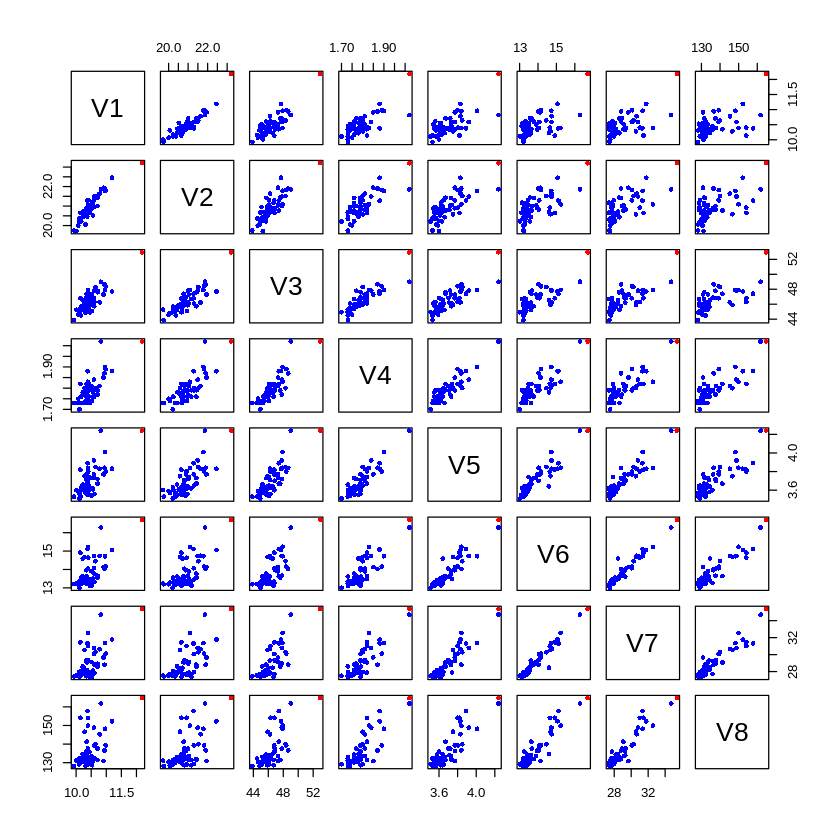

In [ ]:
colores=rep("blue",dim(d)[1])
colores[d[,2]>23]="red"
pairs(d,cex=0.8,pch=16,col=colores)

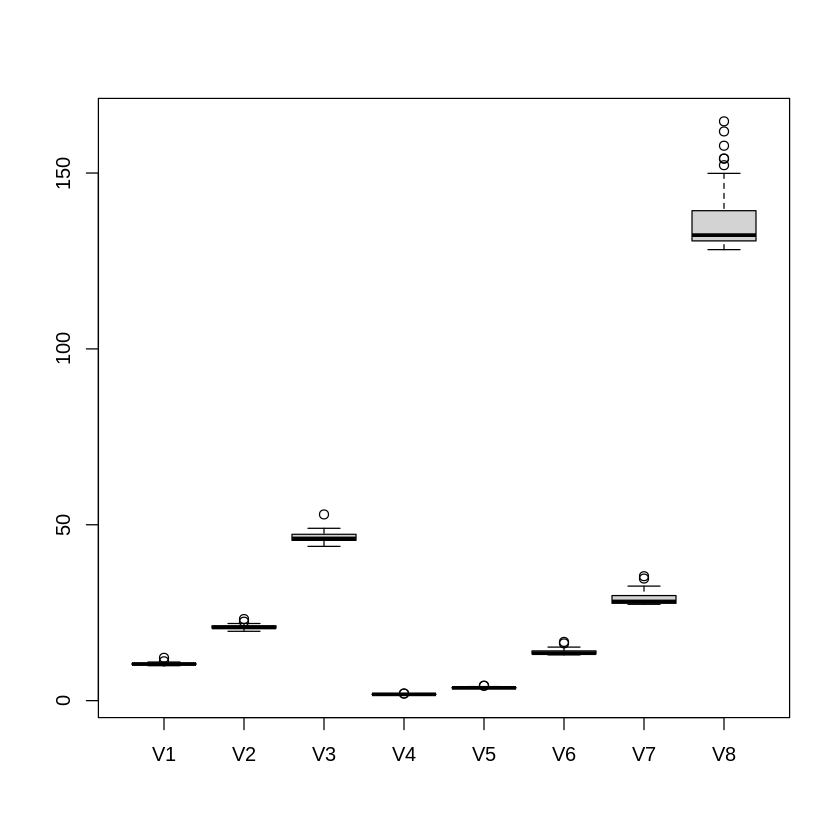

In [ ]:
boxplot(d)

In [ ]:
library(ggplot2)

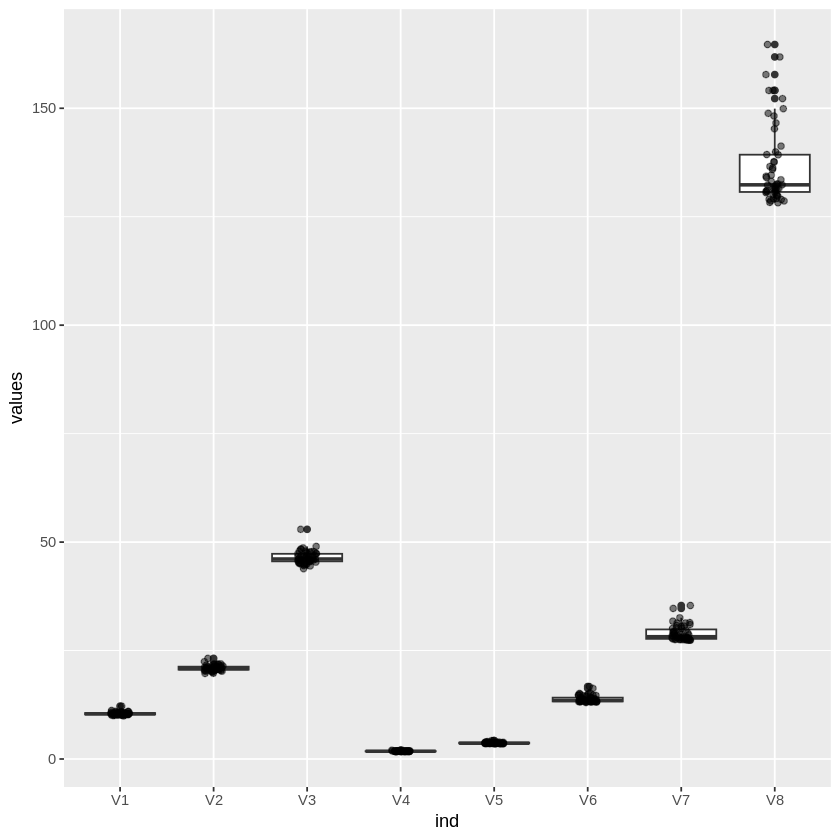

In [ ]:
ggplot(stack(d), aes(x = ind, y = values)) +
  geom_boxplot()+
      geom_jitter(width=0.1, alpha=0.5)

In [ ]:
install.packages("ellipse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



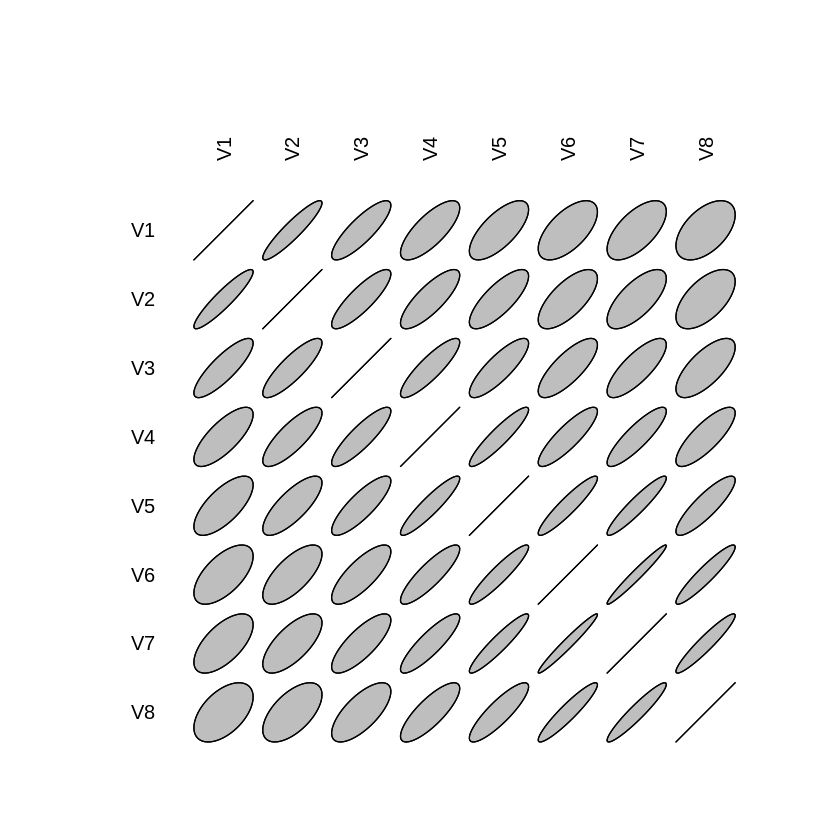

In [ ]:
library(ellipse)
plotcorr(cor(d))

# **Parte 2: PCA**

In [ ]:
p<-princomp(d,cor=F)


In [ ]:
summary(p)


Importance of components:
                          Comp.1     Comp.2      Comp.3      Comp.4
Standard deviation     9.3956814 1.17768501 0.505093772 0.327766451
Proportion of Variance 0.9801107 0.01539844 0.002832452 0.001192745
Cumulative Proportion  0.9801107 0.99550910 0.998341555 0.999534300
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     0.1637199719 0.1118091995 4.693359e-02 2.091562e-02
Proportion of Variance 0.0002975924 0.0001387949 2.445604e-05 4.856911e-06
Cumulative Proportion  0.9998318921 0.9999706871 9.999951e-01 1.000000e+00

In [ ]:
loadings(p)


Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
V1         0.211         0.359  0.190  0.887              
V2         0.359         0.834        -0.410              
V3  0.111  0.828  0.378 -0.396                            
V4                                            0.261 -0.965
V5                                            0.959  0.262
V6         0.130 -0.336        -0.909  0.184              
V7  0.181  0.299 -0.849 -0.135  0.364                     
V8  0.973 -0.181  0.142                                   

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125
Cumulative Var  0.125  0.250  0.375  0.500  0.625  0.750  0.875  1.000

In [ ]:
names(p)

[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

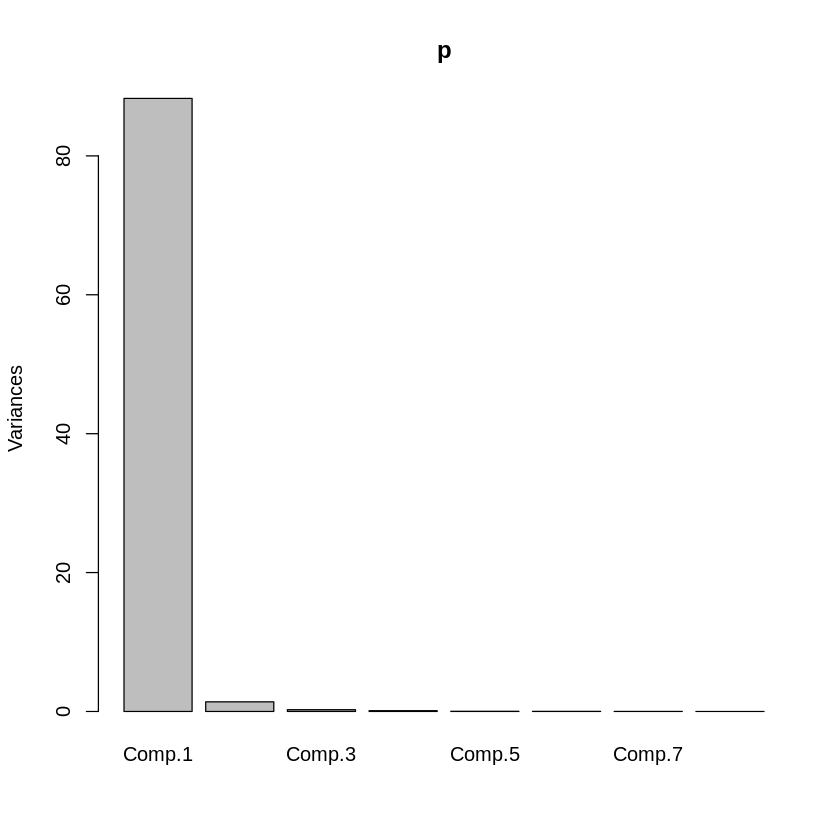

In [ ]:
screeplot(p)

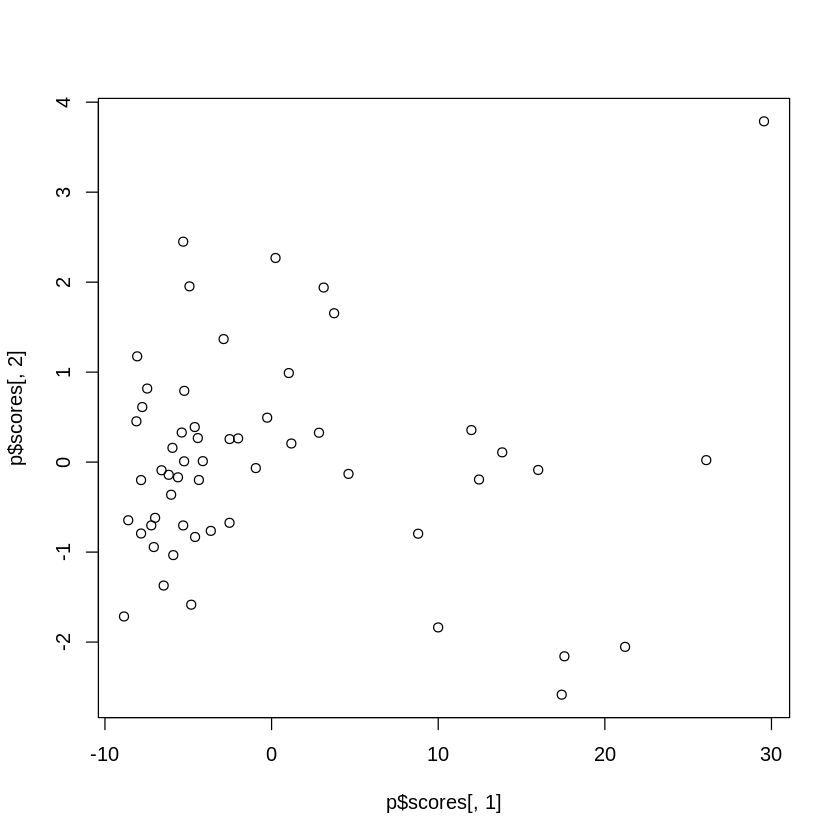

In [ ]:
plot(p$scores[,1], p$scores[,2])

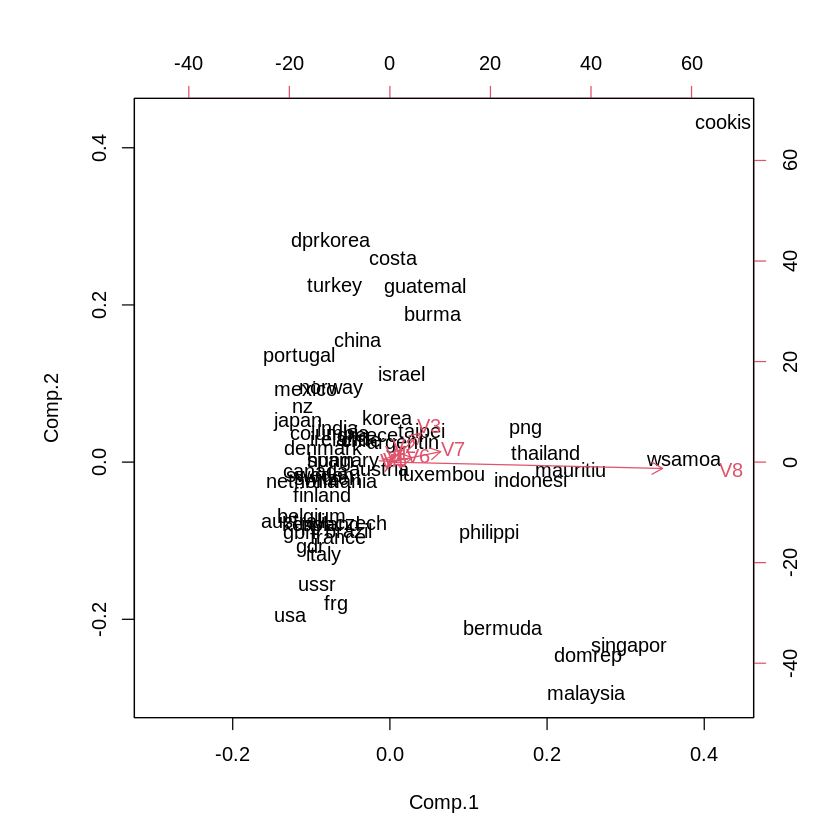

In [ ]:
biplot(p)